sources

https://scikit-learn.org/stable/modules/svm.html
https://levelup.gitconnected.com/text-cleansing-in-nlp-tasks-594b93d648d6
https://medium.com/analytics-vidhya/comprehensive-hands-on-guide-to-twitter-sentiment-analysis-with-dataset-and-code-960c055ada3f
https://www.kaggle.com/datasets/kazanova/sentiment140
https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/
https://www.kaggle.com/code/stoicstatic/twitter-sentiment-analysis-for-beginners?scriptVersionId=68181216
https://www.analyticsvidhya.com/blog/2022/06/stemming-vs-lemmatization-in-nlp-must-know-differences/#:~:text=Stemming%20is%20a%20process%20that,form%2C%20which%20is%20called%20Lemma.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
https://takelab.fer.hr/podium/examples/tfidf_example.html

In [2]:
import pandas as pd

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import spacy
spacy.load('en_core_web_sm')

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

import numpy as np



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olija\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
pd. set_option('display.max_rows', 10)
pd. set_option('display.max_columns', None)
pd. set_option('display.width', None)
pd. set_option('display.max_colwidth', None)

In [4]:
sentiment140ProcessedDf = pd.read_csv("sentiment140Processed.csv")
sentiment140ProcessedDf.head()

sentimentScore  \
0               0   
1               0   
2               0   
3               0   
4               0   

                                                                                                                 tweet  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D   
1      is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!   
2                            @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds   
3                                                                      my whole body feels itchy and like its on fire    
4      @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.    

      label  \
0  negative   
1  negative   
2  negative   
3  negative   
4  negative   

                                                                                                 cleanTweet  \
0                                 awww thats a bummer you shoulda got david carr of third day to do it wink   
1  is upset that he cant update his facebook by texting it and might cry as a result school today also blah   
2                                i dived many times for the ball managed to save  the rest go out of bounds   
3                                                            my whole body feels itchy and like its on fire   
4                     no its not behaving at all im mad why am i here because i cant see you all over there   

                                                                 lemmatizedTweet  \
0                         awww that bummer shoulda get david carr third day wink   
1  upset can not update facebook texting might cry result school today also blah   
2                                     dive many time ball manage save rest bound   
3                                                whole body feel itchy like fire   
4                                                         behave mad can not see   

                                                                 unLemNoStops  
0                     awww thats bummer shoulda got david carr third day wink  
1  upset cant update facebook texting might cry result school today also blah  
2                              dived many times ball managed save rest bounds  
3                                            whole body feels itchy like fire  
4                                                       behaving mad cant see

In [5]:
sentiment140ProcessedDf.tail()

sentimentScore  \
1599995               1   
1599996               1   
1599997               1   
1599998               1   
1599999               1   

                                                                                  tweet  \
1599995                        Just woke up. Having no school is the best feeling ever    
1599996  TheWDB.com - Very cool to hear old Walt interviews!  â« http://blip.fm/~8bmta   
1599997                       Are you ready for your MoJo Makeover? Ask me for details    
1599998               Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur    
1599999                  happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H    

            label  \
1599995  positive   
1599996  positive   
1599997  positive   
1599998  positive   
1599999  positive   

                                                          cleanTweet  \
1599995       just woke up having no school is the best feeling ever   
1599996           thewdbcom  very cool to hear old walt interviews     
1599997      are you ready for your mojo makeover ask me for details   
1599998  happy th birthday to my boo of alll time tupac amaru shakur   
1599999                                      happy charitytuesday      

                                         lemmatizedTweet  \
1599995                       wake school good feel ever   
1599996           thewdbcom cool hear old walt interview   
1599997                   ready mojo makeover ask detail   
1599998  happy birthday boo alll time tupac amaru shakur   
1599999                             happy charitytuesday   

                                            unLemNoStops  
1599995                    woke school best feeling ever  
1599996          thewdbcom cool hear old walt interviews  
1599997                  ready mojo makeover ask details  
1599998  happy birthday boo alll time tupac amaru shakur  
1599999                             happy charitytuesday

**Insights from the Sentiment 140 training data **

number of sentiment140 positive tweets: 800000
number of sentiment140 negative tweets: 800000


[Text(0.5, 1.0, 'Number of positive and negative tweets in Sentiment140 training data')]

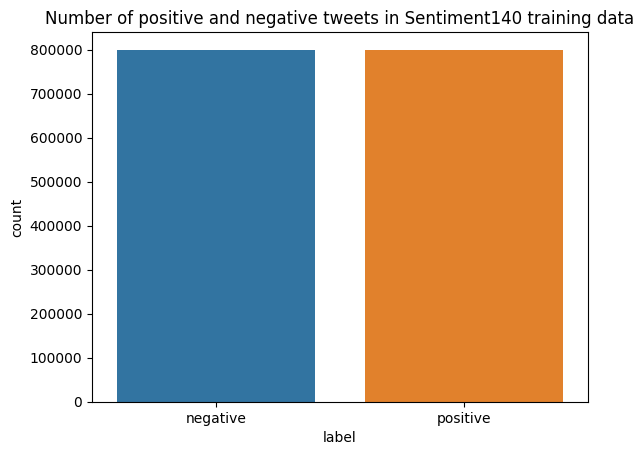

In [5]:
sentiment140Positive = sentiment140ProcessedDf[sentiment140ProcessedDf['label'] == 'positive']
sentiment140Negative = sentiment140ProcessedDf[sentiment140ProcessedDf['label'] == 'negative']
print("number of sentiment140 positive tweets: " + str(sentiment140Positive.shape[0]))
print("number of sentiment140 negative tweets: " + str(sentiment140Negative.shape[0]))
sns.countplot(x=sentiment140ProcessedDf['label'], label= 'count').set(title='Number of positive and negative tweets in Sentiment140 training data')


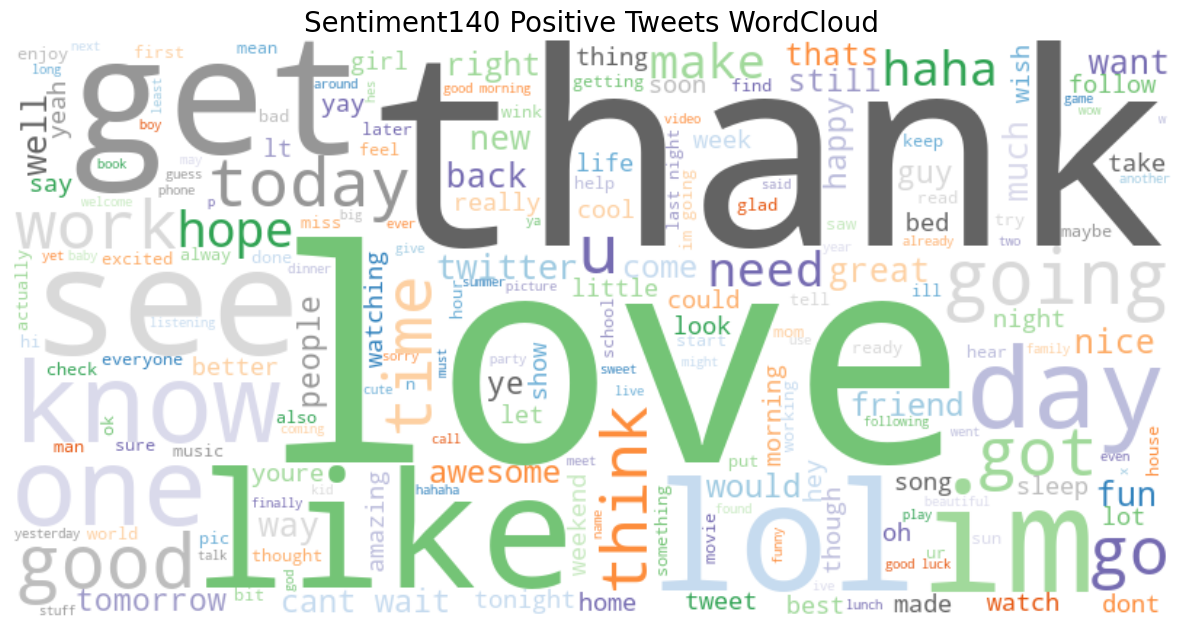

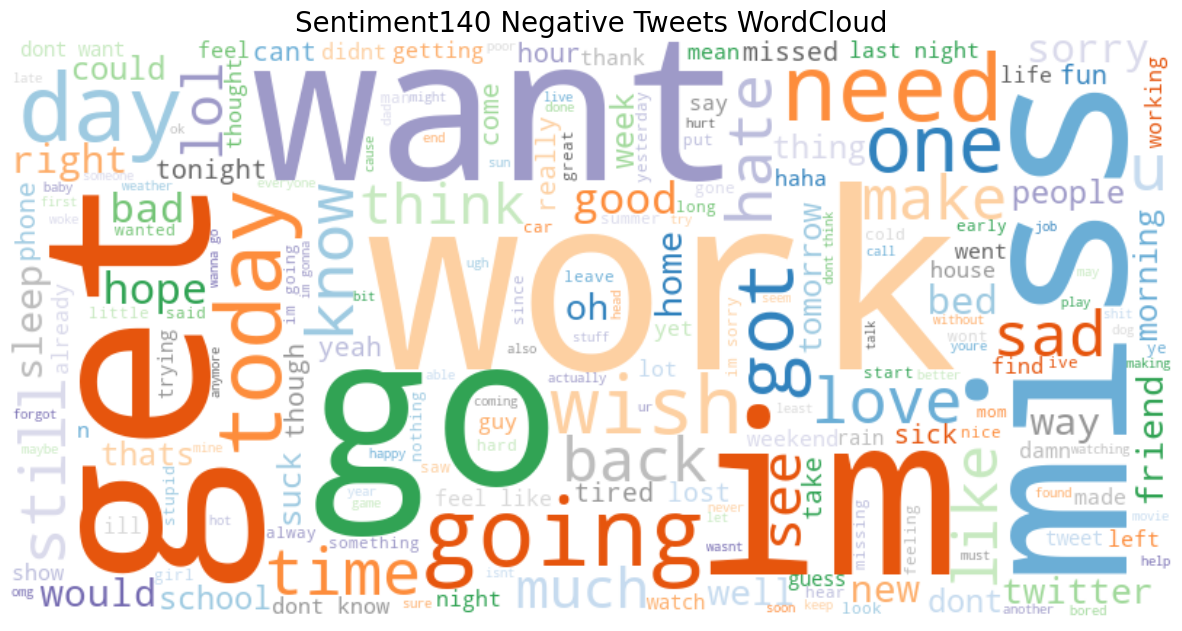

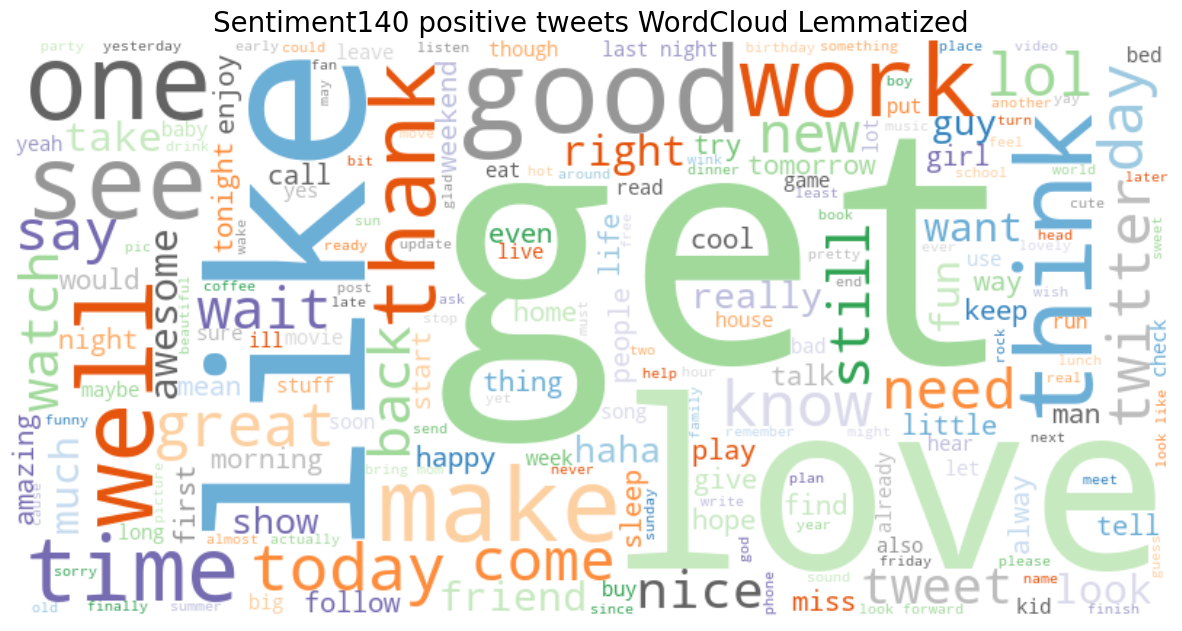

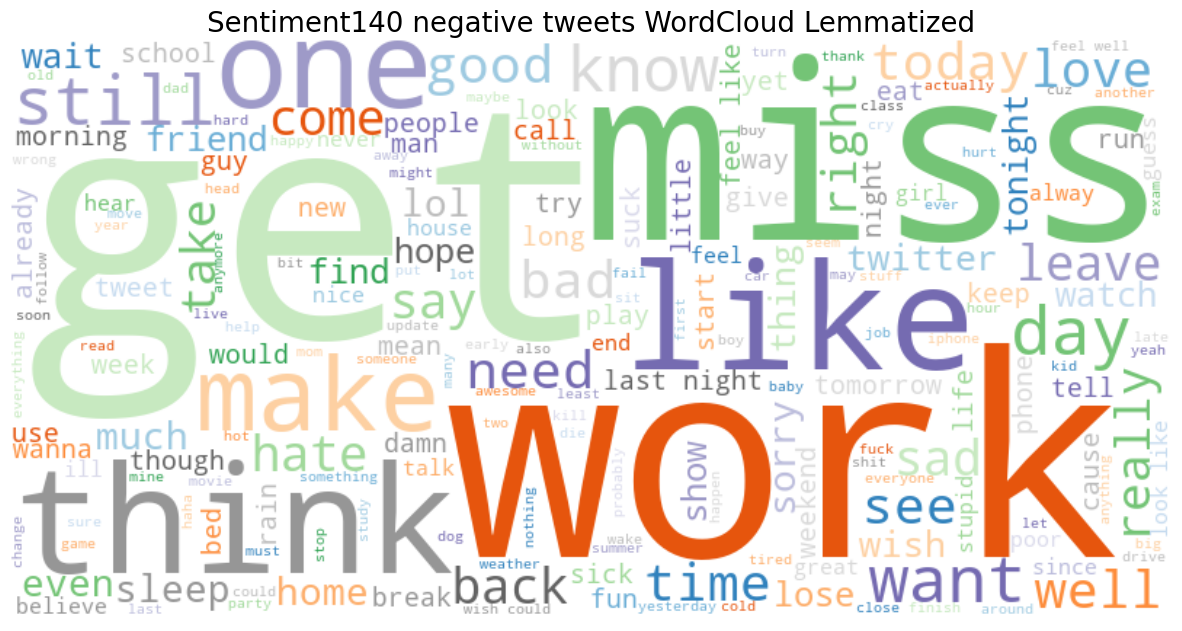

In [32]:
stops = set(stopwords.words('english'))

stops.add("amp")

def tweetsDfToWC(df, dfCollumn, wcTitle, stopwordSet):
    tweets_list = df[dfCollumn].apply(lambda x: str(x)).tolist()
    tweets_string = "".join(tweets_list)
    wc = WordCloud(width=800, height=400, background_color='white', colormap='tab20c', stopwords=stopwordSet).generate(tweets_string)
    plt.figure(figsize = (15,15))
    plt.title(wcTitle, fontsize = 20)
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")


tweetsDfToWC(sentiment140Positive, "cleanTweet", "Sentiment140 Positive Tweets WordCloud", stops)
tweetsDfToWC(sentiment140Negative, "cleanTweet", "Sentiment140 Negative Tweets WordCloud", stops)
tweetsDfToWC(sentiment140Positive, "lemmatizedTweet", "Sentiment140 positive tweets WordCloud Lemmatized", stops)
tweetsDfToWC(sentiment140Negative, "lemmatizedTweet", "Sentiment140 negative tweets WordCloud Lemmatized", stops)


In [5]:
# source: https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
def evaluateModel(modelName, svcModel, xTest, yTest):
    y_pred = svcModel.predict(xTest)
    print(classification_report(yTest, y_pred))
    cf_matrix = confusion_matrix(yTest, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Negative','False Positive', 'False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '', xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title (modelName + " Confusion Matrix", fontdict = {'size':18}, pad = 20)

# source: https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/
def showROCCurve(modelName, svcModel, xTest, yTest):
    Y_pred1 = svcModel.predict(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, Y_pred1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkred', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(modelName + ' ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()


In [6]:
def trainAndTestSVC(columnString, testSize, randomState, vectoriser, modelName):
    X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf[columnString].apply(lambda x: np.str_(x)), 
    sentiment140ProcessedDf['sentimentScore'], test_size=testSize, random_state=randomState)  
    # ngram_range required is tuple e.g. (1,1) or (1,2)
    # ngram_range 1,1 means only unigrams are considered, 1,2 unigrams and bigrams
    # Transforming Xtrain and Xtest data using TF-IDF
    vectoriser = vectoriser
    vectoriser.fit_transform(X_train)
    print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
    X_train = vectoriser.transform(X_train)
    X_test  = vectoriser.transform(X_test)
    print("X_train shape: ", X_train.shape)
    print("Y_train shape: ", Y_train.shape)
    print("X_test shape: ", X_test.shape)
    print("Y_test shape: ", Y_test.shape)
    # Training SVM (LinearSVC) model
    svcModel = LinearSVC()
    svcModel.fit(X_train, Y_train)
    # evaluating model
    evaluateModel(modelName, svcModel, X_test, Y_test)
    showROCCurve(modelName, svcModel, X_test, Y_test)

**SVM Model 1**
Creating SVM model, training model

No. of feature_words:  324881
X_train shape:  (1200000, 324881)
Y_train shape:  (1200000,)
X_test shape:  (400000, 324881)
Y_test shape:  (400000,)
              precision    recall  f1-score   support

           0       0.77      0.75      0.76    199581
           1       0.76      0.78      0.77    200419

    accuracy                           0.76    400000
   macro avg       0.76      0.76      0.76    400000
weighted avg       0.76      0.76      0.76    400000



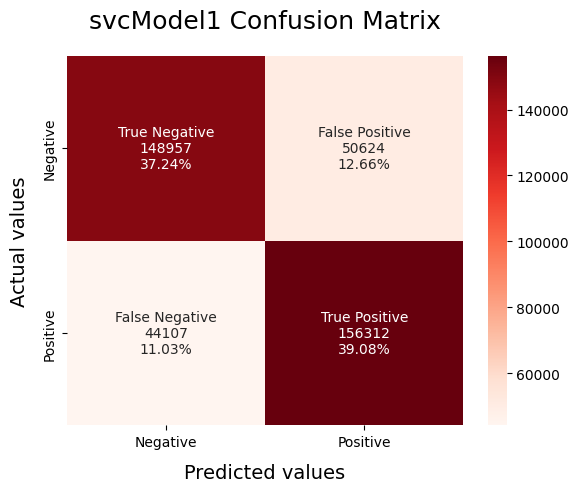

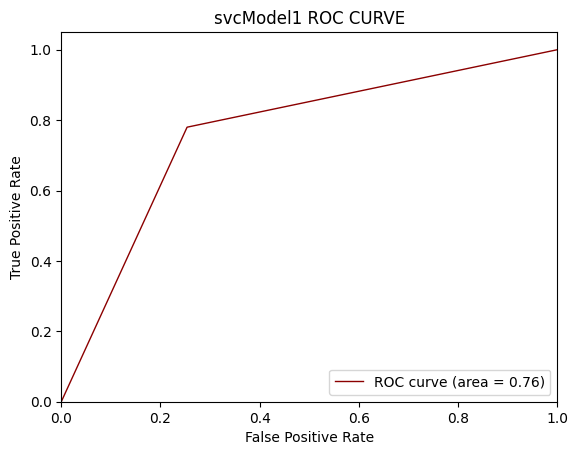

In [35]:
# trainAndTestSVC(columnString="lemmatizedTweet", testSize=0.25, randomState=42, ngramTuple=(1,1), maxFeatures=500000, modelName="svcModel1")

trainAndTestSVC(columnString="lemmatizedTweet", testSize=0.25, randomState=42,
vectoriser=TfidfVectorizer(ngram_range=(1,1),max_features=500000), modelName="svcModel1")


**SVC Model 2**
changing test size to 0.2

No. of feature_words:  340049
X_train shape:  (1280000, 340049)
Y_train shape:  (1280000,)
X_test shape:  (320000, 340049)
Y_test shape:  (320000,)
              precision    recall  f1-score   support

           0       0.77      0.75      0.76    159494
           1       0.76      0.78      0.77    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



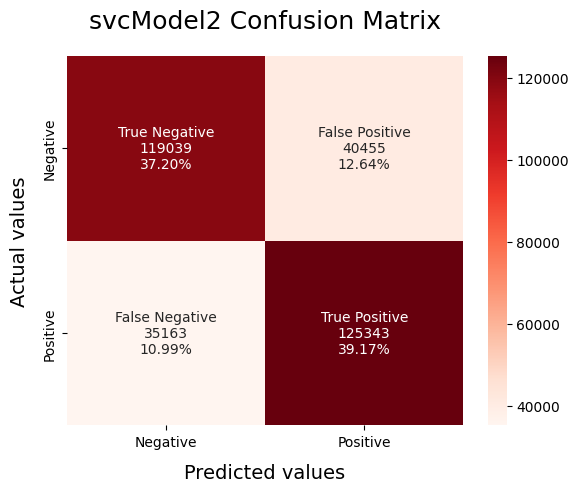

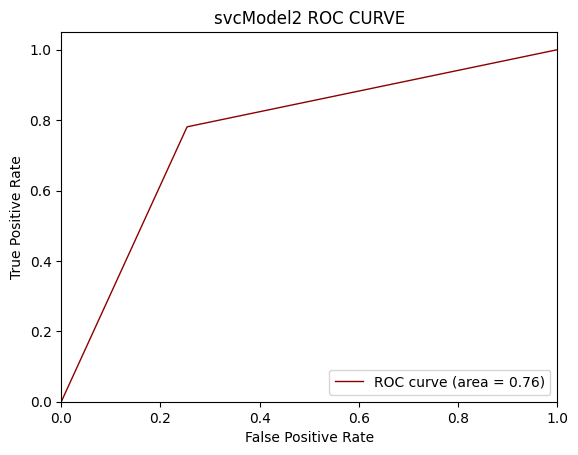

In [37]:
trainAndTestSVC(columnString="lemmatizedTweet", testSize=0.2, randomState=42, vectoriser=TfidfVectorizer(ngram_range=(1,1),max_features=500000), modelName="svcModel2")

**Model 3**
keeping test size 0.25
ngram range 1, 2


No. of feature_words:  500000
X_train shape:  (1200000, 500000)
Y_train shape:  (1200000,)
X_test shape:  (400000, 500000)
Y_test shape:  (400000,)
              precision    recall  f1-score   support

           0       0.78      0.75      0.77    199581
           1       0.76      0.78      0.77    200419

    accuracy                           0.77    400000
   macro avg       0.77      0.77      0.77    400000
weighted avg       0.77      0.77      0.77    400000



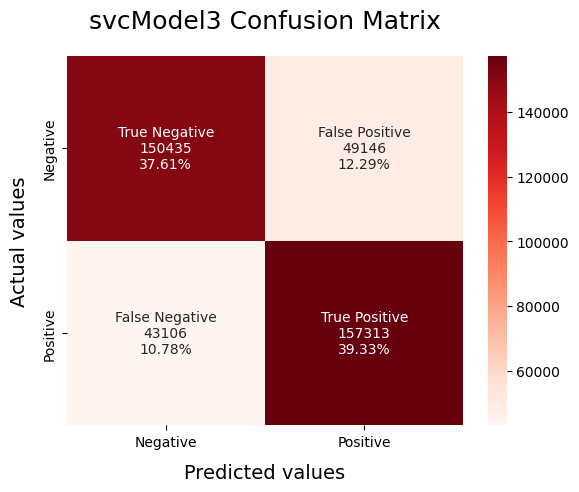

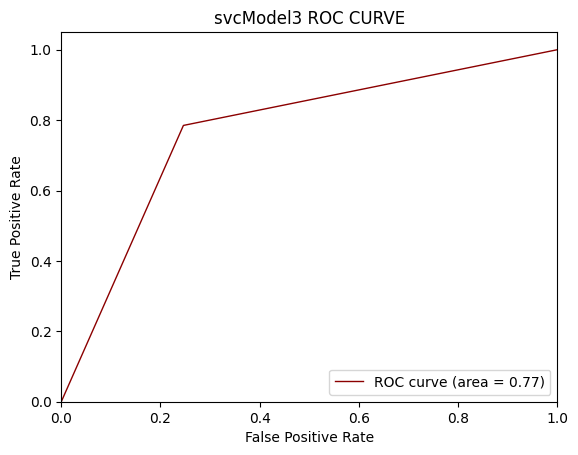

In [38]:
trainAndTestSVC(columnString="lemmatizedTweet", testSize=0.25, randomState=42, vectoriser=TfidfVectorizer(ngram_range=(1,2), max_features=500000), modelName="svcModel3")

**SVC Model 4**
ngram rane 2,2

No. of feature_words:  500000
X_train shape:  (1280000, 500000)
Y_train shape:  (1280000,)
X_test shape:  (320000, 500000)
Y_test shape:  (320000,)
              precision    recall  f1-score   support

           0       0.74      0.64      0.69    159494
           1       0.68      0.78      0.73    160506

    accuracy                           0.71    320000
   macro avg       0.71      0.71      0.71    320000
weighted avg       0.71      0.71      0.71    320000



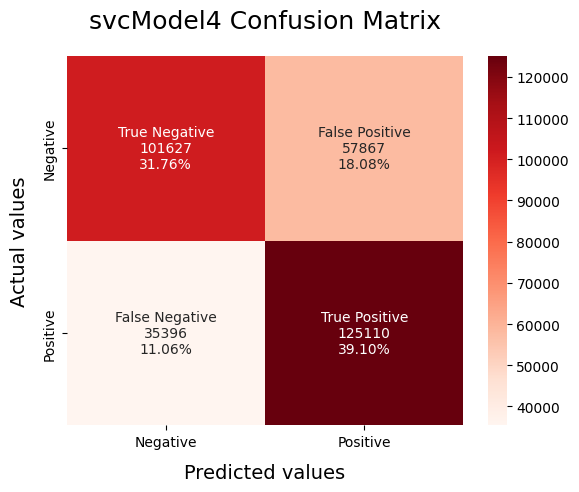

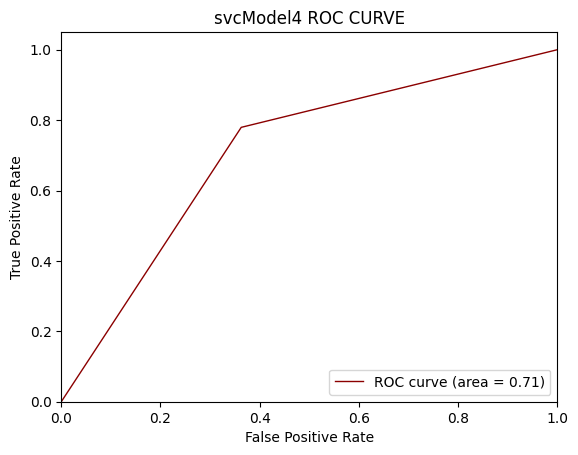

In [24]:
trainAndTestSVC(columnString="lemmatizedTweet", testSize=0.2, randomState=42, vectoriser=TfidfVectorizer(ngram_range=(2,2), maxFeatures=500000), modelName="svcModel4")

**SVC model 5**
ngram_range 1,2
test_size 0.2


No. of feature_words:  500000
X_train shape:  (1280000, 500000)
Y_train shape:  (1280000,)
X_test shape:  (320000, 500000)
Y_test shape:  (320000,)
              precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           1       0.76      0.79      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



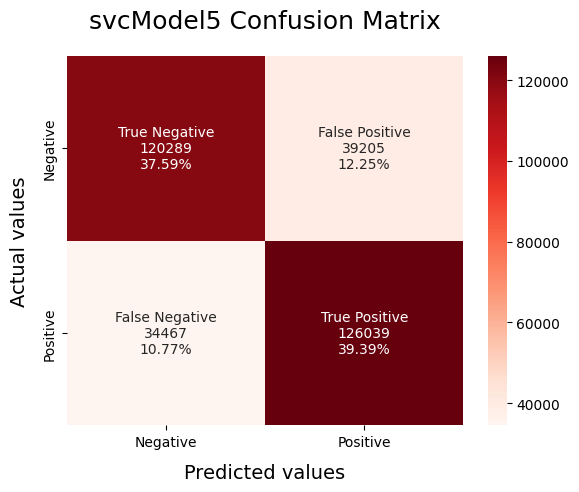

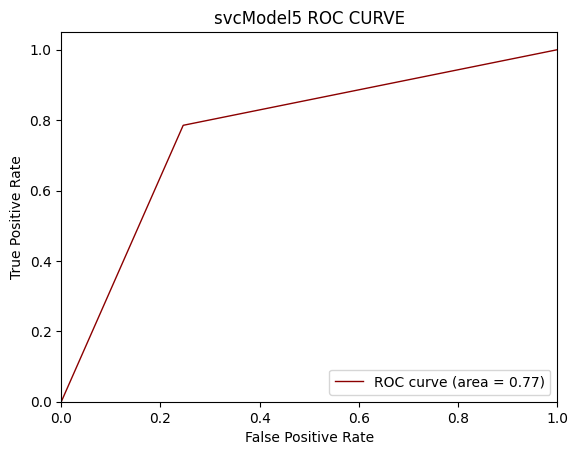

In [58]:
trainAndTestSVC(columnString="lemmatizedTweet", testSize=0.2, randomState=42, vectoriser=TfidfVectorizer(ngram_range=(1,2), max_features=500000), modelName="svcModel5")

**Model 6**
ngram_range = 1,2 test_size = 0.15

No. of feature_words:  500000
X_train shape:  (1360000, 500000)
Y_train shape:  (1360000,)
X_test shape:  (240000, 500000)
Y_test shape:  (240000,)
              precision    recall  f1-score   support

           0       0.78      0.75      0.77    119825
           1       0.76      0.79      0.77    120175

    accuracy                           0.77    240000
   macro avg       0.77      0.77      0.77    240000
weighted avg       0.77      0.77      0.77    240000



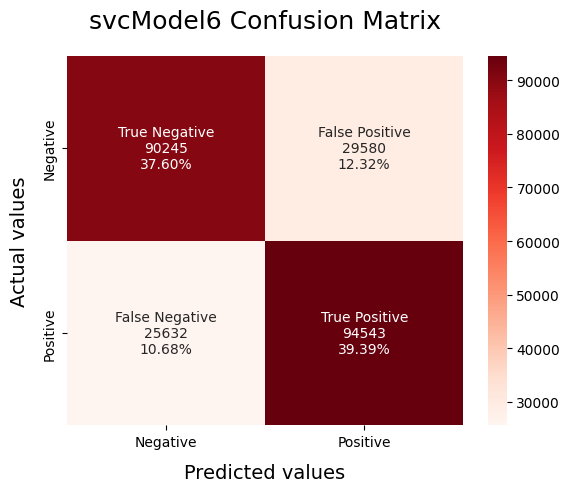

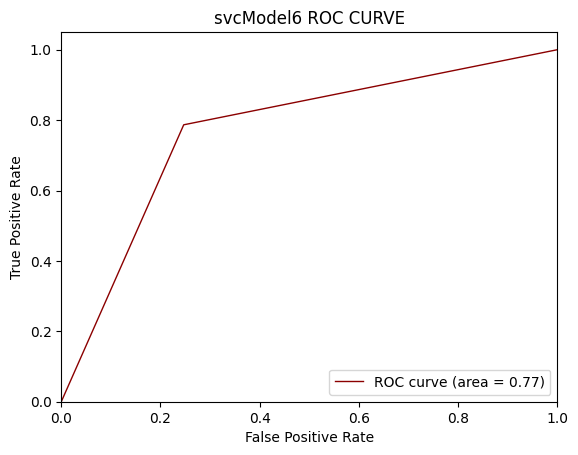

In [ ]:
trainAndTestSVC(columnString="lemmatizedTweet", testSize=0.15, randomState=42, vectoriser=TfidfVectorizer(ngram_range=(1,2), max_features=500000), modelName="svcModel6")

**Model 7**
test_size = 0.2, ngram_range = 1,2, max_features = 800000

No. of feature_words:  800000
X_train shape:  (1280000, 800000)
Y_train shape:  (1280000,)
X_test shape:  (320000, 800000)
Y_test shape:  (320000,)
              precision    recall  f1-score   support

           0       0.78      0.76      0.77    159494
           1       0.76      0.78      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



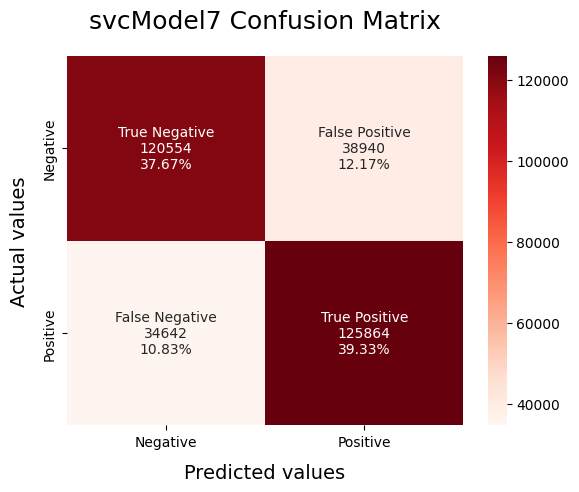

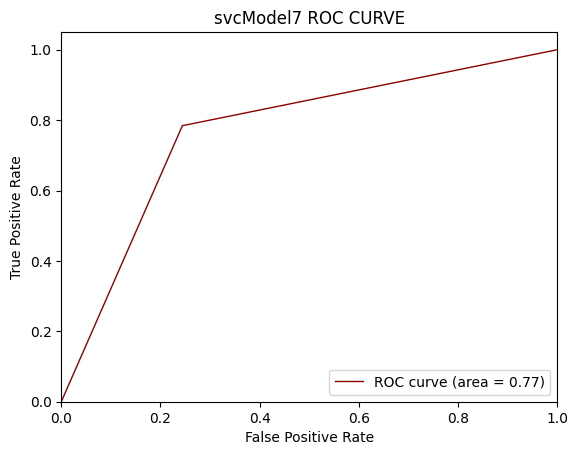

In [ ]:
trainAndTestSVC(columnString="lemmatizedTweet", testSize=0.2, randomState=42, vectoriser=TfidfVectorizer(ngram_range=(1,2), max_features=800000), modelName="svcModel7")

**Model 8**
test_size = 0.2, ngram_range = 2,1, max_features = 300000

No. of feature_words:  300000
X_train shape:  (1280000, 300000)
Y_train shape:  (1280000,)
X_test shape:  (320000, 300000)
Y_test shape:  (320000,)
              precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           1       0.76      0.79      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



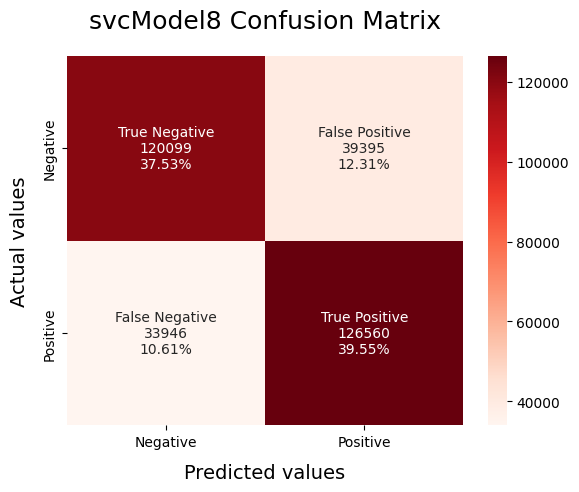

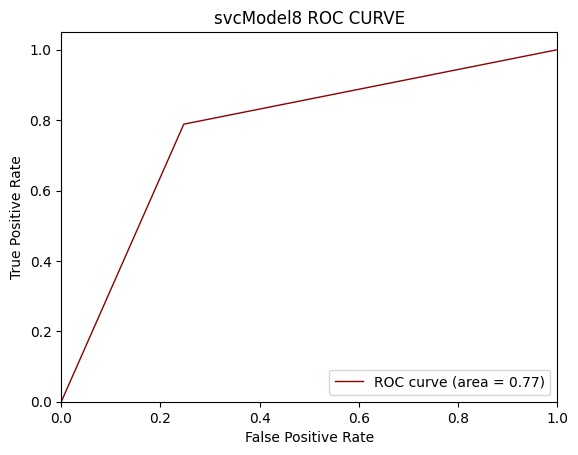

In [41]:
trainAndTestSVC(columnString="lemmatizedTweet", testSize=0.2, randomState=42, vectoriser=TfidfVectorizer(ngram_range=(1,2), max_features=300000), modelName="svcModel8")

**Model 9**
test_size = 0.2, ngram_range = 2,1, max_features = 200000

No. of feature_words:  200000
X_train shape:  (1280000, 200000)
Y_train shape:  (1280000,)
X_test shape:  (320000, 200000)
Y_test shape:  (320000,)
              precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           1       0.76      0.79      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



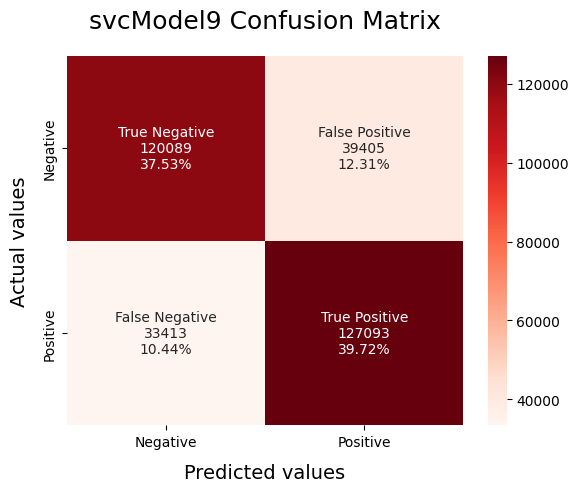

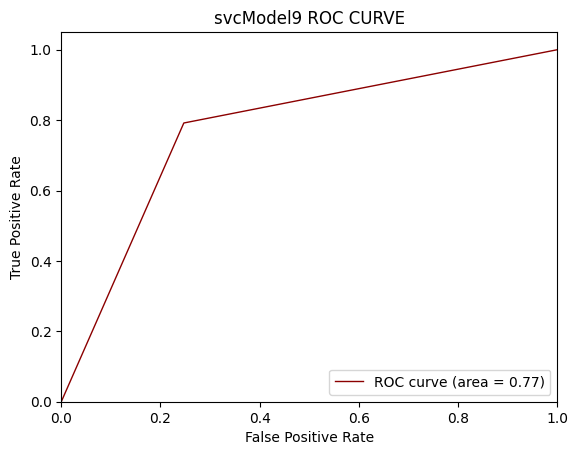

In [42]:
trainAndTestSVC(columnString="lemmatizedTweet", testSize=0.2, randomState=42, vectoriser=TfidfVectorizer(ngram_range=(1,2), max_features=200000), modelName="svcModel9")

**Model 10**
test_size = 0.2, ngram_range = 2,1, max_features = 100000

No. of feature_words:  100000
X_train shape:  (1280000, 100000)
Y_train shape:  (1280000,)
X_test shape:  (320000, 100000)
Y_test shape:  (320000,)
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    159494
           1       0.77      0.80      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



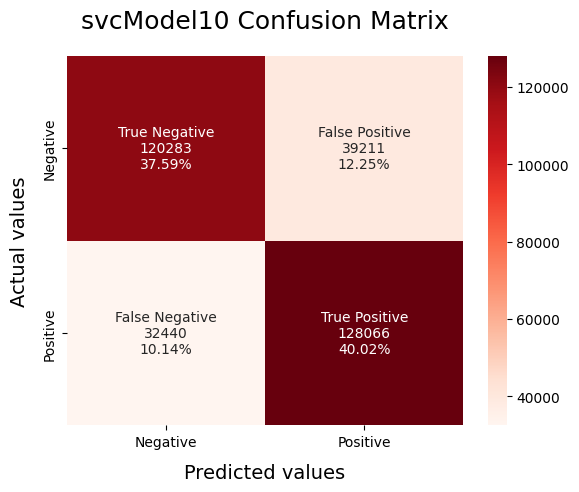

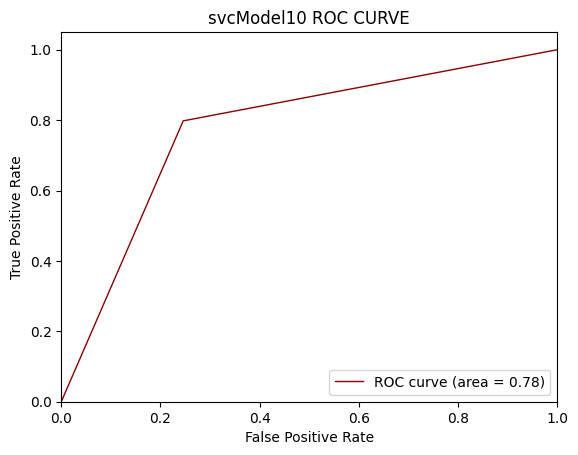

In [43]:
trainAndTestSVC(columnString="lemmatizedTweet", testSize=0.2, randomState=42, vectoriser=TfidfVectorizer(ngram_range=(1,2), max_features=100000), modelName="svcModel10")

**Model 11**
test_size = 0.2, ngram_range = 2,1, max_features = 50000

No. of feature_words:  50000
X_train shape:  (1280000, 50000)
Y_train shape:  (1280000,)
X_test shape:  (320000, 50000)
Y_test shape:  (320000,)
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    159494
           1       0.77      0.80      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



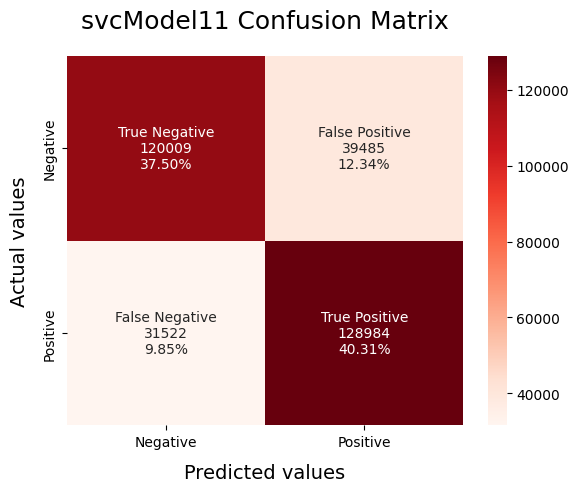

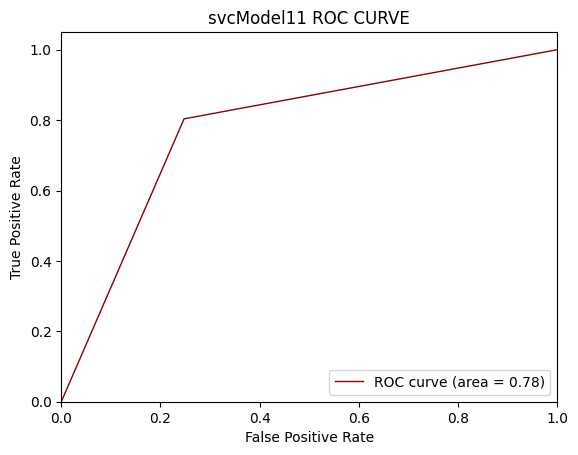

In [44]:
trainAndTestSVC(columnString="lemmatizedTweet", testSize=0.2, randomState=42, vectoriser=TfidfVectorizer(ngram_range=(1,2), max_features=50000), modelName="svcModel11")

**Model 12**
test_size = 0.2, ngram_range = 2,1, max_features = 25000

No. of feature_words:  25000
X_train shape:  (1280000, 25000)
Y_train shape:  (1280000,)
X_test shape:  (320000, 25000)
Y_test shape:  (320000,)
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    159494
           1       0.76      0.80      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



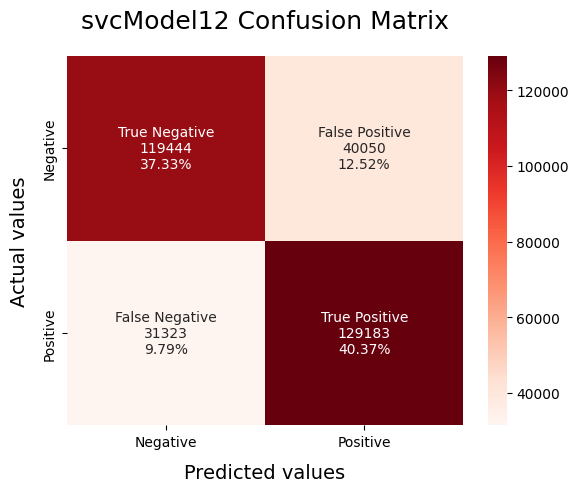

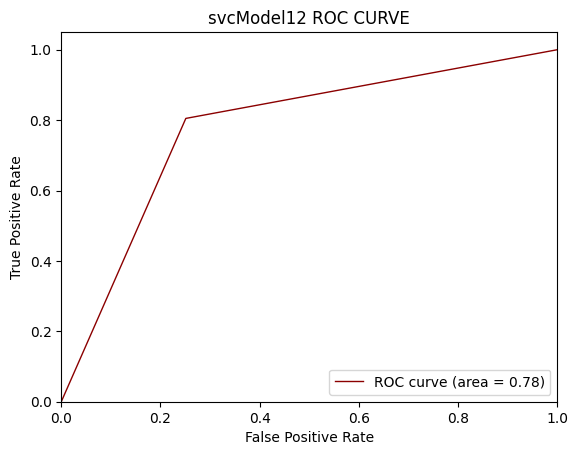

In [45]:
trainAndTestSVC(columnString="lemmatizedTweet", testSize=0.2, randomState=42, vectoriser=TfidfVectorizer(ngram_range=(1,2), max_features=25000), modelName="svcModel12")

**Model 13**
test_size = 0.2, ngram_range = 2,1, max_features = 10000

No. of feature_words:  10000
X_train shape:  (1280000, 10000)
Y_train shape:  (1280000,)
X_test shape:  (320000, 10000)
Y_test shape:  (320000,)
              precision    recall  f1-score   support

           0       0.79      0.74      0.76    159494
           1       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



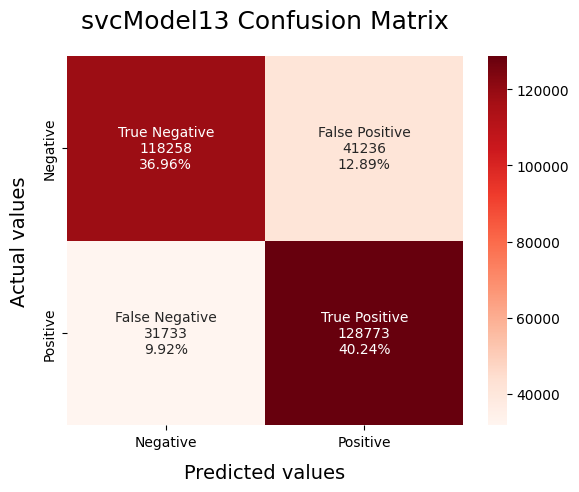

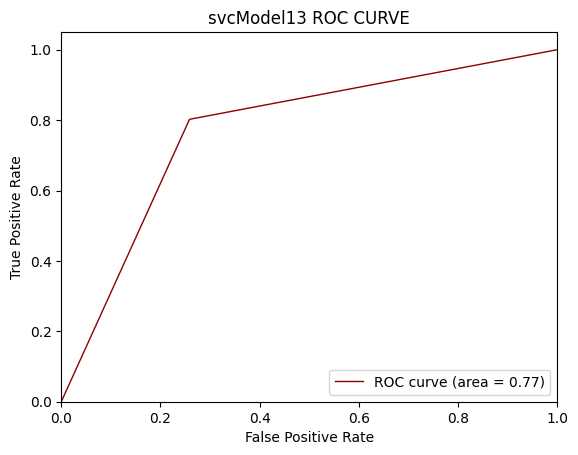

In [46]:
trainAndTestSVC(columnString="lemmatizedTweet", testSize=0.2, randomState=42, vectoriser=TfidfVectorizer(ngram_range=(1,2), max_features=10000), modelName="svcModel13")

**Model 14**
test_size = 0.2, ngram_range = 2,1, max_features = 5000

No. of feature_words:  5000
X_train shape:  (1280000, 5000)
Y_train shape:  (1280000,)
X_test shape:  (320000, 5000)
Y_test shape:  (320000,)
              precision    recall  f1-score   support

           0       0.78      0.73      0.76    159494
           1       0.75      0.80      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



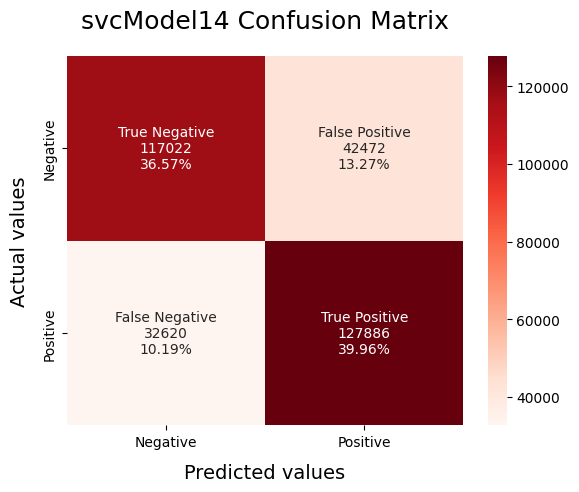

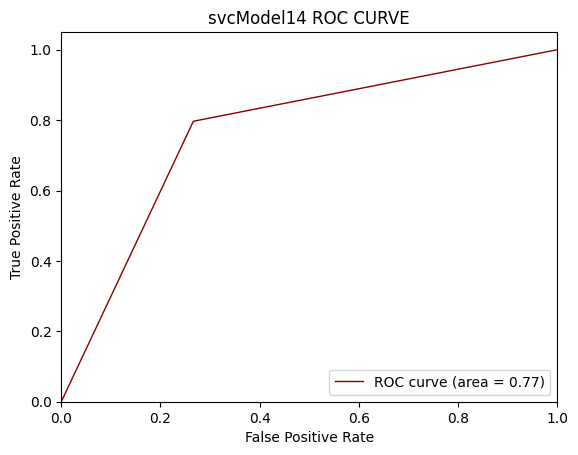

In [47]:
trainAndTestSVC(columnString="lemmatizedTweet", testSize=0.2, randomState=42, vectoriser=TfidfVectorizer(ngram_range=(1,2), max_features=5000), modelName="svcModel14")

**Model 15**
trained on cleanTweet data collumn (not lemmatized)
test_size = 0.2, ngram_range = 2,1, max_features = 100000

No. of feature_words:  100000
X_train shape:  (1280000, 100000)
Y_train shape:  (1280000,)
X_test shape:  (320000, 100000)
Y_test shape:  (320000,)
              precision    recall  f1-score   support

           0       0.82      0.80      0.81    159494
           1       0.81      0.83      0.82    160506

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000



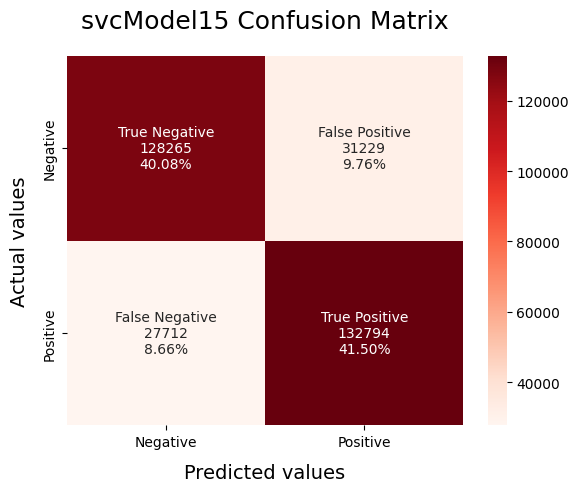

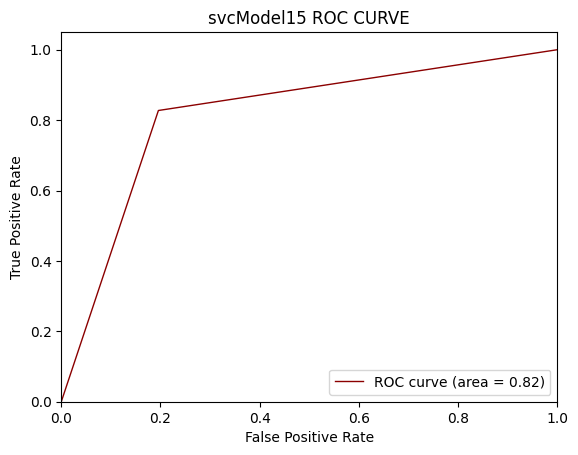

In [48]:
trainAndTestSVC(columnString="cleanTweet", testSize=0.2, randomState=42, vectoriser=TfidfVectorizer(ngram_range=(1,2), max_features=100000), modelName="svcModel15")

**Model 16**
trained on cleanTweet data collumn (not lemmatized)
test_size = 0.2, ngram_range = 2,1, max_features = 500000

No. of feature_words:  500000
X_train shape:  (1280000, 500000)
Y_train shape:  (1280000,)
X_test shape:  (320000, 500000)
Y_test shape:  (320000,)
              precision    recall  f1-score   support

           0       0.82      0.81      0.81    159494
           1       0.81      0.82      0.81    160506

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



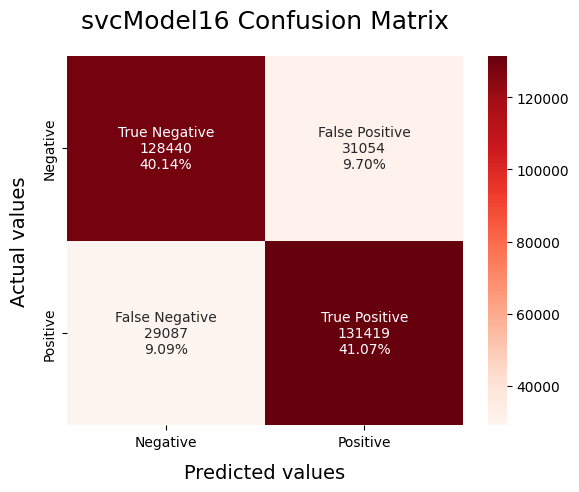

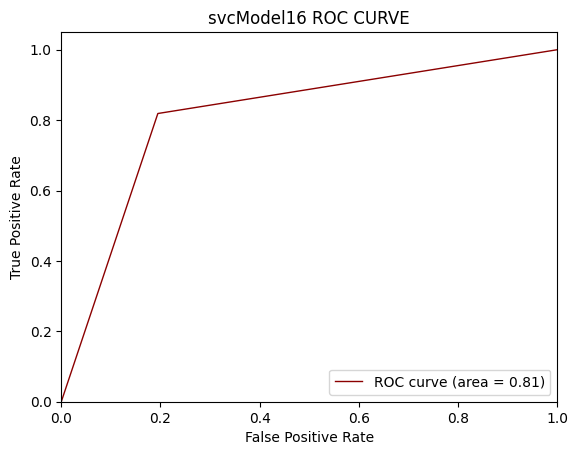

In [49]:
trainAndTestSVC(columnString="cleanTweet", testSize=0.2, randomState=42, vectoriser=TfidfVectorizer(ngram_range=(1,2), max_features=500000), modelName="svcModel16")

**Model 17**
trained on unLemNoStops data collumn (no stopwords but not lemmatized)
test_size = 0.2, ngram_range = 2,1, max_features = 100000

No. of feature_words:  100000
X_train shape:  (1280000, 100000)
Y_train shape:  (1280000,)
X_test shape:  (320000, 100000)
Y_test shape:  (320000,)
              precision    recall  f1-score   support

           0       0.79      0.76      0.78    159494
           1       0.77      0.80      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



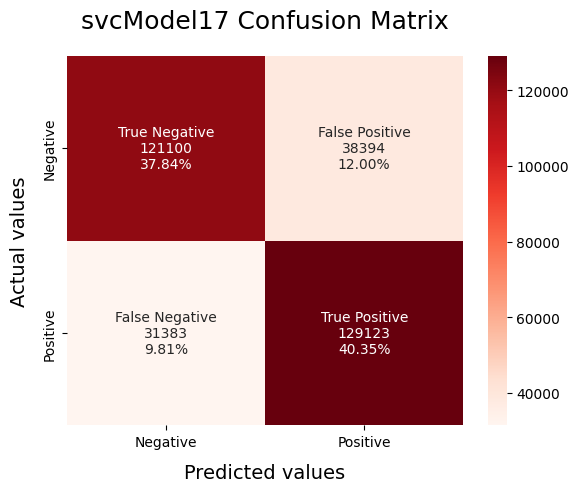

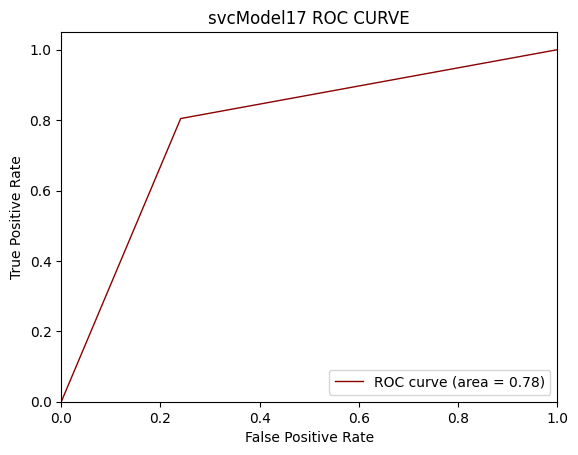

In [50]:
trainAndTestSVC(columnString="unLemNoStops", testSize=0.2, randomState=42, vectoriser=TfidfVectorizer(ngram_range=(1,2), max_features=100000), modelName="svcModel17")

**Model 18**
trained on tweet data collumn (original unprocessed tweet)
test_size = 0.2, ngram_range = 2,1, max_features = 100000

No. of feature_words:  100000
X_train shape:  (1280000, 100000)
Y_train shape:  (1280000,)
X_test shape:  (320000, 100000)
Y_test shape:  (320000,)
              precision    recall  f1-score   support

           0       0.82      0.81      0.82    159494
           1       0.81      0.83      0.82    160506

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000



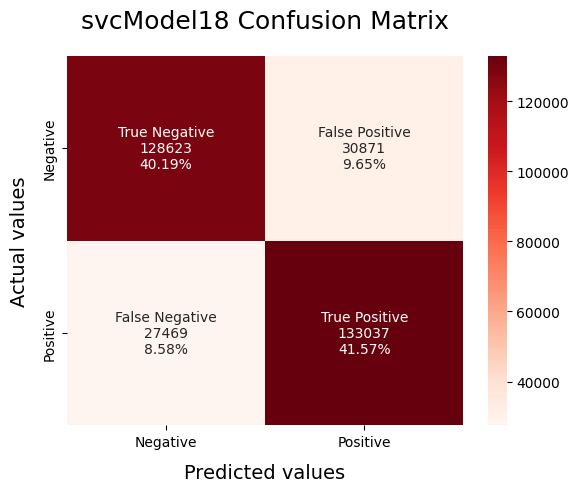

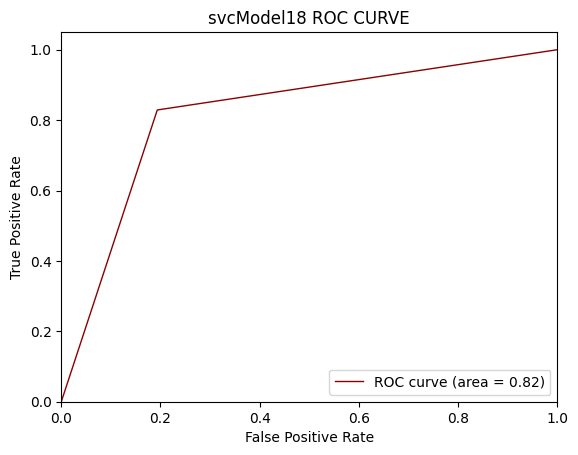

In [51]:
trainAndTestSVC(columnString="tweet", testSize=0.2, randomState=42, vectoriser=TfidfVectorizer(ngram_range=(1,2), max_features=100000), modelName="svcModel18")

**Model 19**
Using CountVectorizer instead of TF-IDF
This was slow (10m33.3s vs approx 1m30s) and did not produce an increase in accuracy.

No. of feature_words:  3292625
X_train shape:  (1280000, 3292625)
Y_train shape:  (1280000,)
X_test shape:  (320000, 3292625)
Y_test shape:  (320000,)


c:\Users\olija\Documents\GitHub\CSCM20_Project\env\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.77      0.75      0.76    159494
           1       0.76      0.78      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



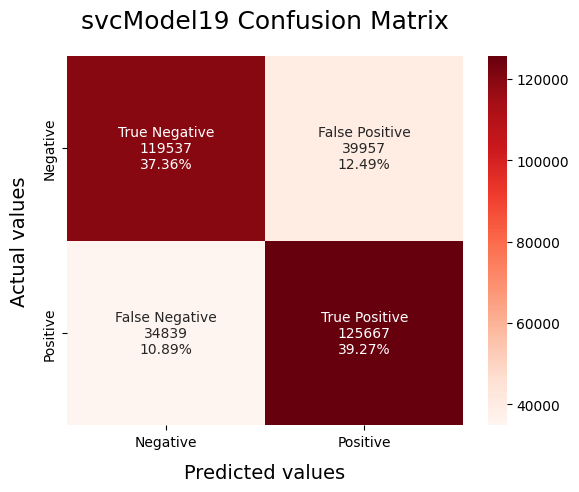

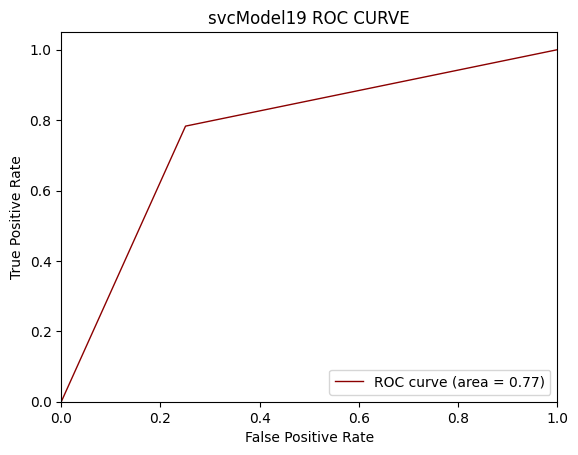

In [52]:
trainAndTestSVC(columnString="lemmatizedTweet", testSize=0.2, randomState=42, vectoriser=CountVectorizer(ngram_range=(1,2)), modelName="svcModel19")

**model 20**
experimenting with overriding built in preprocessor, less accurate

No. of feature_words:  100000
X_train shape:  (1280000, 100000)
Y_train shape:  (1280000,)
X_test shape:  (320000, 100000)
Y_test shape:  (320000,)
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    159494
           1       0.77      0.80      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



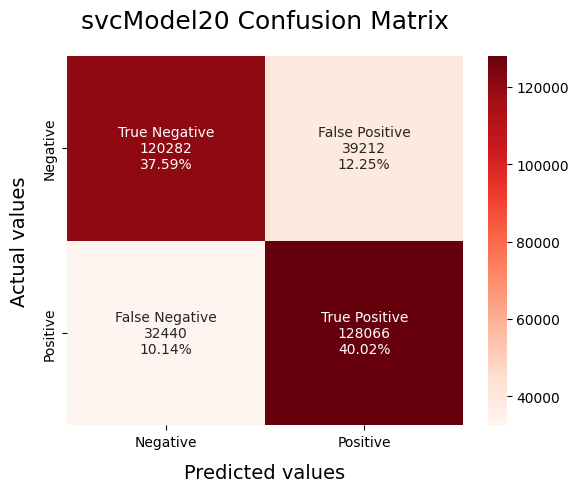

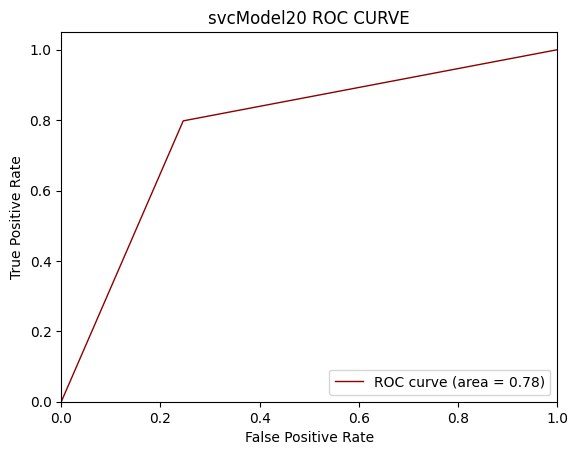

In [53]:
def preProcess(s):
    return s.lower()

trainAndTestSVC(columnString="lemmatizedTweet", testSize=0.2, randomState=42, vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=100000, preprocessor=preProcess), modelName="svcModel20")


**Model20ii**
overriding preprocessor and training on raw tweet data
expecting low accuracy

No. of feature_words:  100000
X_train shape:  (1280000, 100000)
Y_train shape:  (1280000,)
X_test shape:  (320000, 100000)
Y_test shape:  (320000,)
              precision    recall  f1-score   support

           0       0.82      0.81      0.82    159494
           1       0.81      0.83      0.82    160506

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000



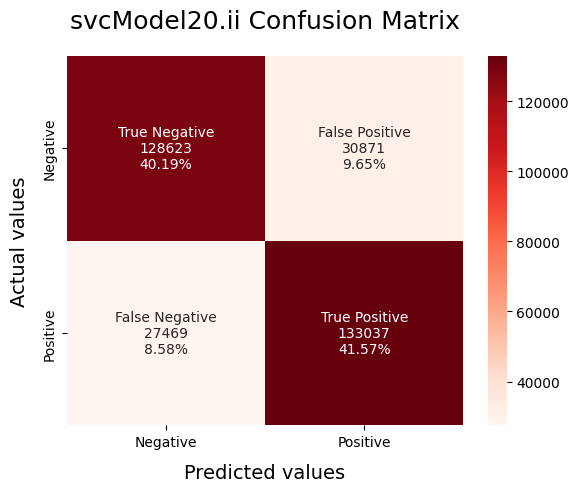

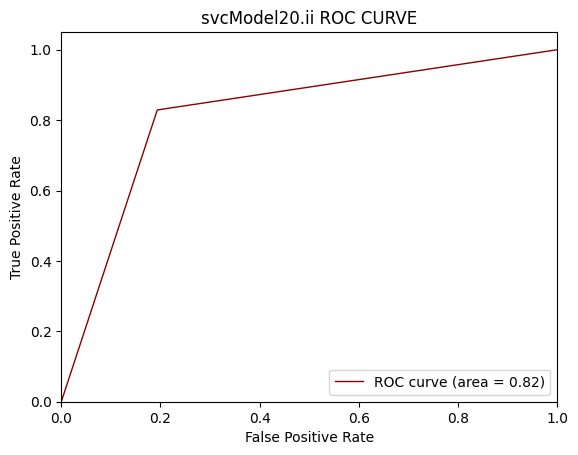

In [57]:
def preProcess(s):
    return s.lower()

trainAndTestSVC(columnString="tweet", testSize=0.2, randomState=42, vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=100000, preprocessor=preProcess), modelName="svcModel20.ii")


**Model 21**

No. of feature_words:  500000
X_train shape:  (1280000, 500000)
Y_train shape:  (1280000,)
X_test shape:  (320000, 500000)
Y_test shape:  (320000,)
              precision    recall  f1-score   support

           0       0.82      0.81      0.81    159494
           1       0.81      0.82      0.82    160506

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



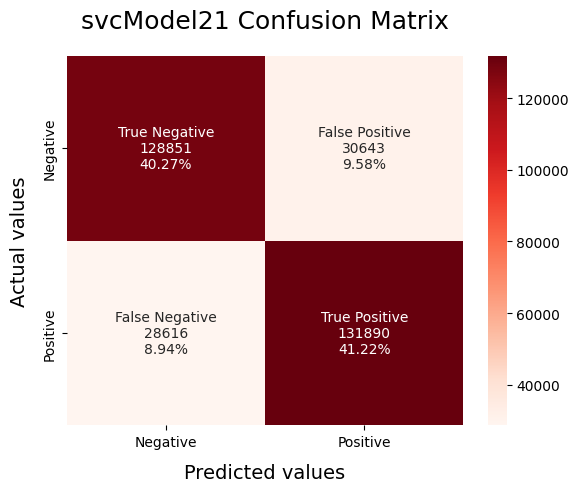

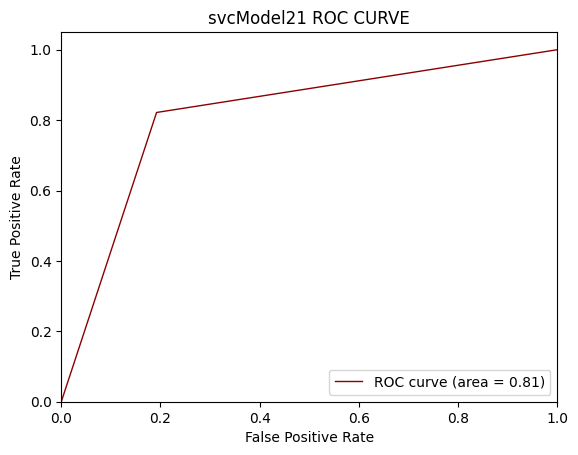

In [54]:
trainAndTestSVC(columnString="tweet", testSize=0.2, randomState=42, vectoriser=TfidfVectorizer(ngram_range=(1,2), max_features=500000), modelName="svcModel21")

**Model 22**

No. of feature_words:  500000
X_train shape:  (1280000, 500000)
Y_train shape:  (1280000,)
X_test shape:  (320000, 500000)
Y_test shape:  (320000,)
              precision    recall  f1-score   support

           0       0.82      0.81      0.81    159494
           1       0.81      0.82      0.81    160506

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



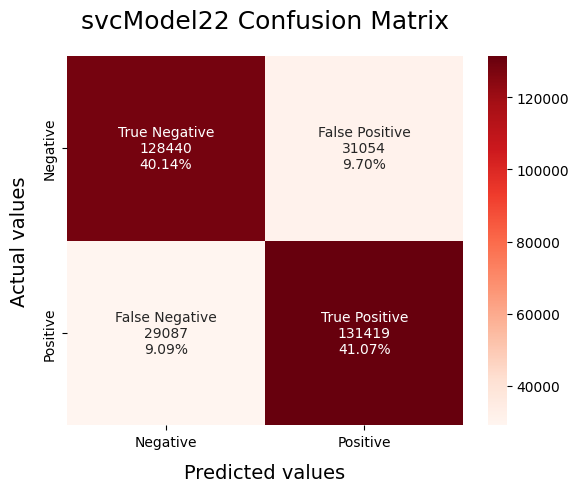

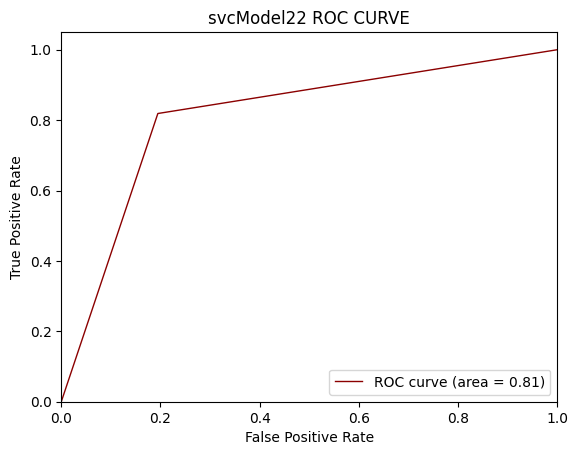

In [55]:
trainAndTestSVC(columnString="cleanTweet", testSize=0.2, randomState=42, vectoriser=TfidfVectorizer(ngram_range=(1,2), max_features=500000), modelName="svcModel22")

**Model A**
So far Model18 has yielded the best results
Creating a model with these settings  

              precision    recall  f1-score   support

           0       0.82      0.81      0.82    159494
           1       0.81      0.83      0.82    160506

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000



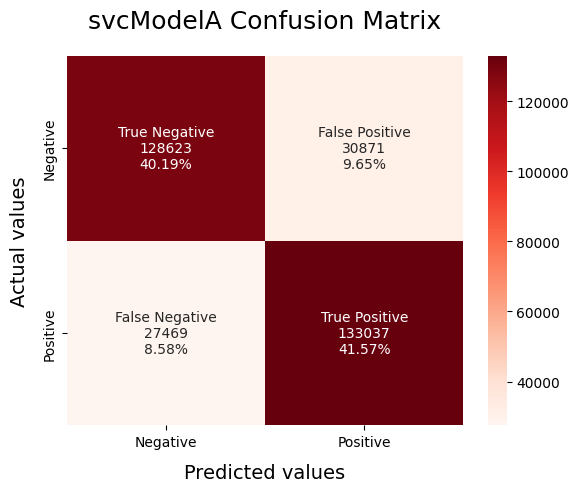

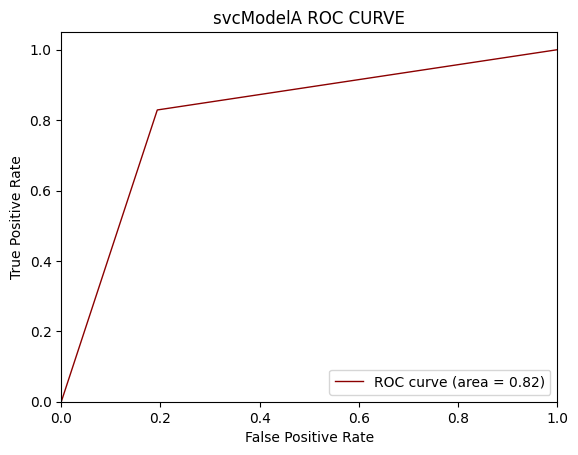

In [8]:
X_train,X_test,Y_train, Y_test = train_test_split(sentiment140ProcessedDf["tweet"].apply(lambda x: np.str_(x)), 
sentiment140ProcessedDf['sentimentScore'], test_size=0.2, random_state=42)  
vectoriserA = TfidfVectorizer(ngram_range=(1,2), max_features=100000)
vectoriserA.fit_transform(X_train)
X_train = vectoriserA.transform(X_train)
X_test  = vectoriserA.transform(X_test)
svcModelA = LinearSVC()
svcModelA.fit(X_train, Y_train)
evaluateModel("svcModelA", svcModelA, X_test, Y_test)
showROCCurve("svcModelA", svcModelA, X_test, Y_test)

In [11]:
def predictSentiment(tweet, vectoriserTFIDF, svmModel):
    tweet = [tweet]
    tweet = vectoriserTFIDF.transform(tweet)
    sentiment = svmModel.predict(tweet)[0]
    if sentiment == 0:
        return "negative"
    else:
        return "positive"
    

text = "You are all a bunch of idiots, i hate you"
sentiment = predictSentiment(text, vectoriserA, svcModelA)
print(sentiment)
text2 = "i love you everything is fantastic"
sentiment2 = predictSentiment(text2, vectoriserA, svcModelA)
print(sentiment2)

negative
positive


In [12]:
tweetsDf = pd.read_csv("twitterDataOutput.csv")
tweetsDf.head

<bound method NDFrame.head of                             date                   id  \
0       2022-05-31T23:14:24.000Z  1531776135083720711   
1       2022-05-31T22:17:29.000Z  1531761813922136065   
2       2022-05-31T22:09:18.000Z  1531759753071845376   
3       2022-05-31T22:05:43.000Z  1531758850273050626   
4       2022-05-31T22:04:05.000Z  1531758441521467395   
...                          ...                  ...   
448735  2019-01-01T00:20:15.000Z  1079895037868232704   
448736  2019-01-01T00:19:16.000Z  1079894793583509507   
448737  2019-01-01T00:18:55.000Z  1079894704504913920   
448738  2019-01-01T00:16:20.000Z  1079894051745382410   
448739  2019-01-01T00:14:27.000Z  1079893578829230081   

                                                                                                                                                                                                                                                                                             

In [13]:
from datetime import datetime
import plotly.express as px

tweetsDf['label'] = tweetsDf['tweet'].apply(lambda x: predictSentiment(x, vectoriserA, svcModelA))
positiveTweets = tweetsDf[tweetsDf['label'] == "positive"]
negativeTweets = tweetsDf[tweetsDf['label'] == "negative"]
print("number of positive tweets: " + str(positiveTweets.shape[0]))
print("number of negative tweets: " + str(negativeTweets.shape[0]))




number of positive tweets: 284813
number of negative tweets: 163927


[Text(0.5, 1.0, 'Number of positive and negative tweets')]

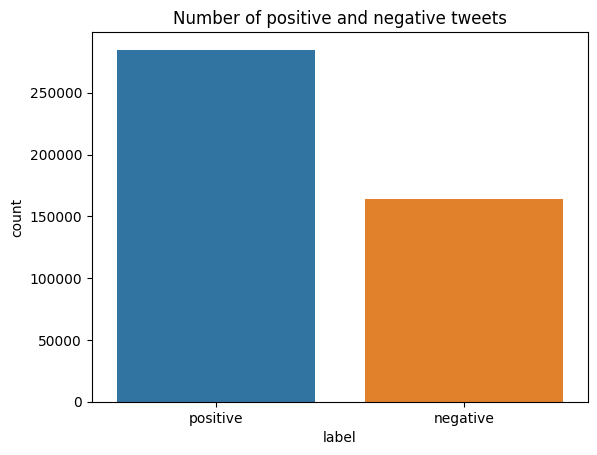

In [89]:
sns.countplot(x=tweetsDf['label'], label= 'count').set(title='Number of positive and negative tweets')

In [22]:
def floorDate(dateString):
    shortDateStr = dateString[:10]
    shortDateFormat = "%Y-%m-%d"
    return datetime.strptime(shortDateStr, shortDateFormat)

tweetsDf['day'] = tweetsDf['date'].apply(lambda x: floorDate(x))

aggregate = {'cnt': ('id', 'count')}
sentimentOverTimeDf = tweetsDf.groupby(['day', 'label']).agg(**aggregate).reset_index()
sentimentOverTimeDf

fig = px.line(sentimentOverTimeDf, x='day', y='cnt', color='label', title = "SVM sentiment analysis of UK-based Asia-related tweets Jan 2019 - Jun 2022", width=1800, height=600,

labels={
                     "day": "Date",
                     "cnt": "Number of tweets"
                 },
             color_discrete_map={ # replaces default color mapping by value
                "negative":  '#EF553B', "positive": '#00CC96'
            }
)
           
fig.show()

**Negative tweets as a percentage of total Tweets**

In [19]:
# creating new df 
negativeSentimentProportionDf = tweetsDf.groupby(['day']).agg(**aggregate).reset_index()
negativeSentimentProportionDf.rename(columns={'cnt': 'totalTweetsCnt'}, inplace=True)

def getSentimentLabelCount(day, sentimentStr):
    #day is a date string corresponding to format: 2019-01-01
    subDf = sentimentOverTimeDf.loc[(sentimentOverTimeDf['day'] == day) & (sentimentOverTimeDf['label'] == sentimentStr)]
    # return subDf.iloc[0]['totalTweetsCnt']
    return subDf.iloc[0]['cnt']

negativeSentimentProportionDf['negativeCnt'] = negativeSentimentProportionDf['day'].apply(lambda x: getSentimentLabelCount(x, "negative"))
negativeSentimentProportionDf['percentNegative'] = (negativeSentimentProportionDf["negativeCnt"] / negativeSentimentProportionDf["totalTweetsCnt"]) * 100
negativeSentimentProportionDf.head()

day  totalTweetsCnt  negativeCnt  percentNegative
0 2019-01-01             420          169        40.238095
1 2019-01-02             473          160        33.826638
2 2019-01-03             633          207        32.701422
3 2019-01-04             478          174        36.401674
4 2019-01-05             421          134        31.828979

In [23]:
fig = px.line(negativeSentimentProportionDf, x='day', y='percentNegative', title = "SVM sentiment analysis of UK-based Asia-related tweets Jan 2019 - Jun 2022: negative tweets as a percentage of total Tweets collected", width=1800, height=600,

labels={
                     "day": "Date",
                     "percentNegative": "Percentage of Tweets that are Negative"
                 },
             color_discrete_map={ # replaces default color mapping by value
                "percentNegative":  '#EF553B'
            }
)

fig.update_traces(line_color='brown')
           
fig.show()

In [28]:
print(type(negativeSentimentProportionDf['day'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [34]:
# negativeSentimentProportionDf['week'] = tweetsDf['day'].apply(lambda x: round_date(x, "week"))

negativeSentimentProportionDf['week'] = pd.to_datetime(negativeSentimentProportionDf["day"]).dt.to_period('W-SUN').dt.start_time
negativeSentimentProportionDf.head(20)


day  totalTweetsCnt  negativeCnt  percentNegative       week
0  2019-01-01             420          169        40.238095 2018-12-31
1  2019-01-02             473          160        33.826638 2018-12-31
2  2019-01-03             633          207        32.701422 2018-12-31
3  2019-01-04             478          174        36.401674 2018-12-31
4  2019-01-05             421          134        31.828979 2018-12-31
..        ...             ...          ...              ...        ...
15 2019-01-16             423          136        32.151300 2019-01-14
16 2019-01-17             462          140        30.303030 2019-01-14
17 2019-01-18             517          151        29.206963 2019-01-14
18 2019-01-19             383          101        26.370757 2019-01-14
19 2019-01-20             419          131        31.264916 2019-01-14

[20 rows x 5 columns]

In [43]:
print(negativeSentimentProportionDf["week"][0])

2018-12-31 00:00:00


In [48]:

weekAvgNegativeSentimentProportionDf = negativeSentimentProportionDf.groupby(["week"]).agg(**aggregate).reset_index()
weekAvgNegativeSentimentProportionDf.head()

KeyError: "Column(s) ['id'] do not exist"